In [1]:
import mircxpol as mp
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import Angle, SkyCoord, EarthLocation, AltAz
import pandas as pd 


# import sys
# from matplotlib.widgets import Slider
# import ipywidgets as widgets
# from ipywidgets import interact, FloatSlider
# from IPython.display import display, HTML


In [2]:
path_csv = "./2022October_Wollaston_Reduced_NORMED AVERAGED/MIRCX_2022Oct19_W2S2_fancy.csv"
df = pd.read_csv(path_csv)

MJD_data = df['MJD'].values
HA_data = df[' HA'].values
# VisRatio
VisRatio_data = df[' VisRatio_normed'].values
VisRatio_err_data = df[' visratio_normed_err'].values
# PhaseDiff
PD_data = df[' PhaseDiff'].values
PD_err_data = df[' Phase_err'].values
# Tel1_ratio
T1_ratio_data = df[' Tel1_ratio'].values
T1_ratio_err_data = df['tel1_ratio_err'].values
# Tel2_ratio
T2_ratio_data = df['tel2_ratio'].values
T2_ratio_err_data = df['tel2_ratio_err'].values

MJD = Time(MJD_data, format='mjd')
tt = MJD.to_value('iso')
chara = EarthLocation.of_site("CHARA")
upsand = SkyCoord.from_name("ups and")
upsandaltaz = upsand.transform_to(AltAz(obstime = tt, location=chara))
alt_data = upsandaltaz.alt
az_data = upsandaltaz.az

In [3]:
popt1 = least_squares(mp.err_global, mp.var, args=(alt_data, az_data, VisRatio_data, PD_data, T1_ratio_data, T2_ratio_data, VisRatio_err_data, PD_err_data, T1_ratio_err_data, T2_ratio_err_data), 
                      bounds = mp.bound, verbose=2)             

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.9298e+05                                    5.15e+06    
       1              2         1.2354e+04      6.81e+05       4.98e-01       4.65e+05    
       2              3         1.2810e+03      1.11e+04       1.84e-01       8.62e+03    
       3              4         1.2732e+03      7.76e+00       9.77e-02       6.01e+02    
       4              6         1.2720e+03      1.22e+00       1.72e-01       1.87e+03    
       5              7         1.2718e+03      2.26e-01       1.64e-02       5.07e+01    
       6              9         1.2718e+03      3.29e-03       1.68e-02       4.51e+01    
       7             11         1.2718e+03      2.09e-03       4.20e-03       1.04e+01    
       8             13         1.2718e+03      1.42e-04       1.13e-03       2.90e+00    
       9             15         1.2718e+03      8.01e-06       5.63e-04       1.44e+00    

In [4]:
for i in range(len(mp.list)):
    print(mp.list[i] + '=', popt1.x[i])
    if i in mp.list_index:
        print('-----------------------------')    

r_m31= 0.9897428723256219
c_m31= 0.06568035097086605
r_m41= 1.048959805051357
c_m41= 0.008939035520881586
r_m81= 1.107021736538022
c_m81= -0.3745824116248885
-----------------------------
r_m32= 1.0137717869928076
c_m32= -0.06569218356653546
r_m42= 1.0121091940838254
c_m42= 0.42657348620475644
r_m82= 1.0904151127973027
c_m82= 0.37458351371401677


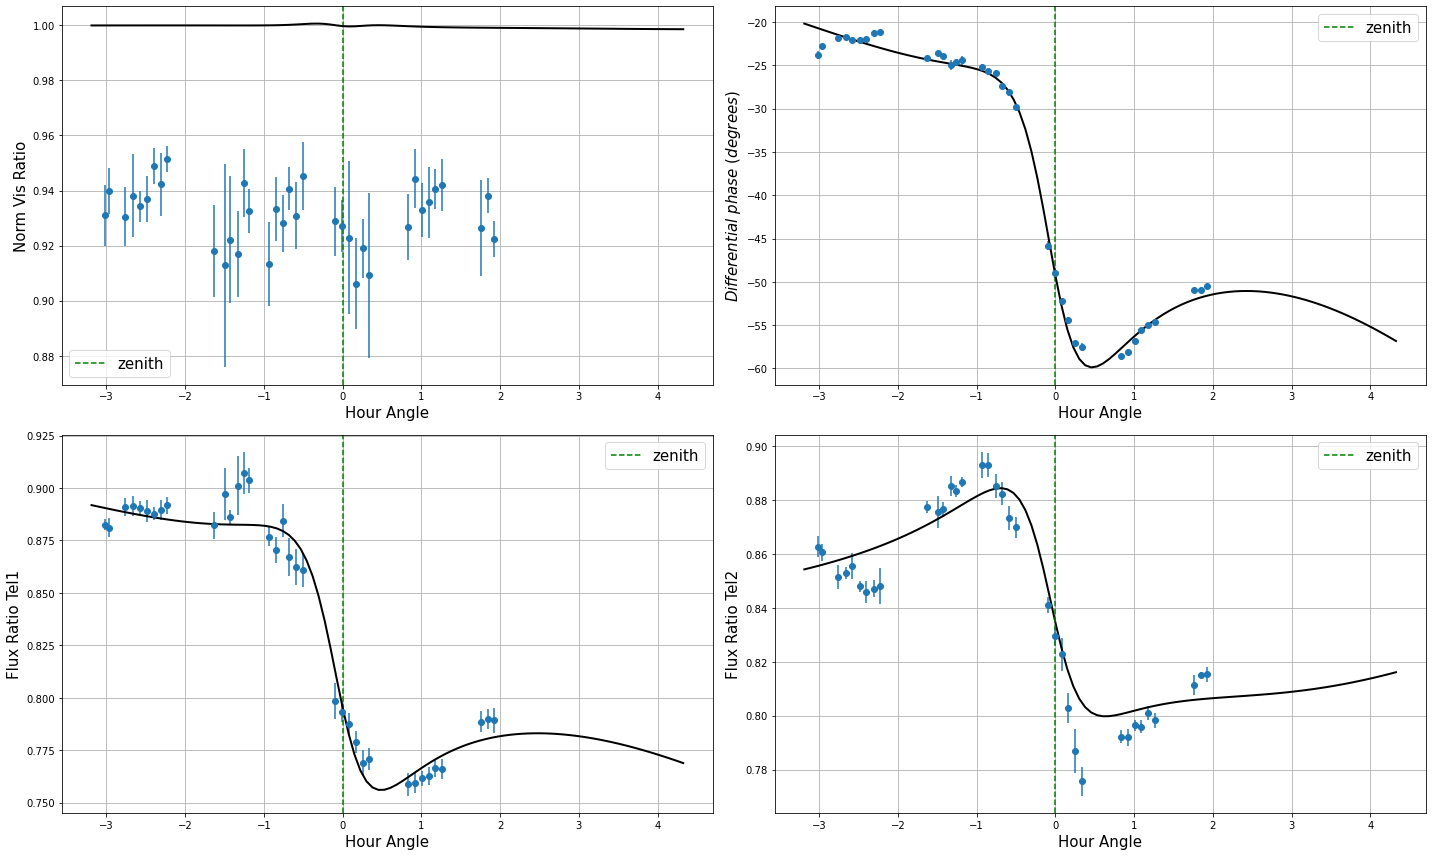

In [5]:
time = np.linspace(4.5, 12.01, 100) * u.hour
upsand = SkyCoord.from_name("ups and")
ptime = Time("2022-10-19 0:00:00") + time 
HA = Angle(time).value
chara = EarthLocation.of_site("CHARA")
upsandaltaz = upsand.transform_to(AltAz(obstime=ptime, location=chara))
alt = upsandaltaz.alt
az = upsandaltaz.az
# Find the index of the maximum altitude
zenith_idx = np.argmax(alt)
zenith_time = HA[zenith_idx]
HA = HA - zenith_time

plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.axvline(x = HA[zenith_idx], color='green', linestyle='--', label='zenith')
plt.plot(HA.flatten(), mp.func1(alt, az, popt1.x), linewidth=2, color='black')
# plt.plot(HA.flatten(), mp.func_vis_comp(alt, az, popt1.x)[0], label="VH", linestyle='--')
# plt.plot(HA.flatten(), mp.func_vis_comp(alt, az, popt1.x)[1], label="VV", linestyle='-.')
plt.errorbar(HA_data, VisRatio_data, yerr = VisRatio_err_data, fmt = 'o')
plt.ylabel("Norm Vis Ratio", fontsize = 15)
plt.xlabel("Hour Angle", fontsize = 15)
plt.grid()
plt.legend(fontsize = 15)

plt.subplot(2, 2, 2)
plt.axvline(x = HA[zenith_idx], color='green', linestyle='--', label='zenith')
plt.plot(HA, mp.func2(alt, az, popt1.x), linewidth=2, color='black') 
# plt.plot(HA.flatten(), mp.func_vis_comp(alt, az, popt1.x)[2], label="VH", linestyle='--')
# plt.plot(HA.flatten(), mp.func_vis_comp(alt, az, popt1.x)[3], label="VV", linestyle='-.')
plt.errorbar(HA_data, PD_data, yerr = PD_err_data, fmt = 'o')
plt.ylabel(r'$Differential~phase~(degrees)$', fontsize = 15)
plt.xlabel("Hour Angle", fontsize = 15)
plt.grid()
plt.legend(fontsize = 15)


plt.subplot(2, 2, 3)
plt.axvline(x = HA[zenith_idx], color='green', linestyle='--', label='zenith')
plt.plot(HA,mp.func3(alt, az, popt1.x), linewidth=2, color='black')
plt.errorbar(HA_data, T1_ratio_data, yerr = T1_ratio_err_data, fmt = 'o')
plt.ylabel("Flux Ratio Tel1", fontsize = 15)
plt.xlabel("Hour Angle", fontsize = 15)
plt.grid()
plt.legend(fontsize = 15)

plt.subplot(2, 2, 4)
plt.plot(HA, mp.func4(alt, az, popt1.x), linewidth=2, color='black') 
plt.errorbar(HA_data, T2_ratio_data, yerr = T2_ratio_err_data, fmt = 'o')
plt.axvline(x = HA[zenith_idx], color='green', linestyle='--', label='zenith')
plt.ylabel("Flux Ratio Tel2", fontsize = 15)
plt.xlabel("Hour Angle", fontsize = 15)
plt.grid()
plt.legend(fontsize = 15)

plt.tight_layout()
plt.show()

In [6]:
popt1.x

array([ 0.98974287,  0.06568035,  1.04895981,  0.00893904,  1.10702174,
       -0.37458241,  1.01377179, -0.06569218,  1.01210919,  0.42657349,
        1.09041511,  0.37458351])